In [16]:
import pandas as pd
import json
from pathlib import Path
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

In [2]:
df = pd.read_csv('/Users/emilydennis/Desktop/lightsheet/labels_updated/PRA_labels_with-graph-order_children_parents.csv')
df.head(2)

,Unnamed: 0,id,name,parent_id,graph_order,children,has_children,parent_ids
0,0,35,brainstem,0,1,"[39, 40, 41, 577, 595, 189, 190, 265, 266, 267...",1,0
1,1,36,cerebellum,0,1,"[43, 51, 52, 53, 54, 55, 127, 128, 129, 184, 1...",1,0


In [11]:
g = nx.DiGraph()
g.add_node(0,name='root')

for index, row in df.iterrows():
    g.add_node(row.id,name=row.name)
    g.add_edge(row.parent_id,row.id)

labels = nx.get_node_attributes(g, 'name')
pos =graphviz_layout(g, prog='dot')
nx.draw(g, pos, with_labels=True,labels=labels, arrows=True)

NameError: name 'G' is not defined

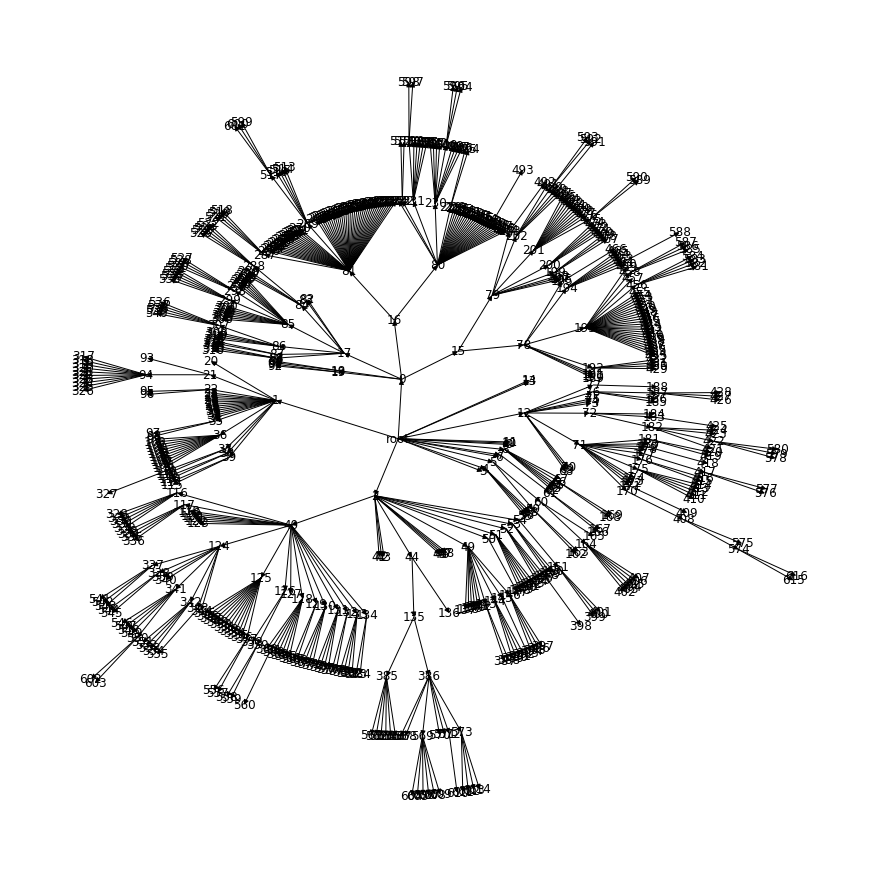

In [29]:
plt.figure(figsize=(12, 12))
pos = graphviz_layout(g, prog="twopi", args="")
nx.draw(g, pos, with_labels=True,labels=labels, arrows=True,node_size=0)

In [66]:
# useful nx functions
nx.all_pairs_lowest_common_ancestor(g)

<generator object all_pairs_lowest_common_ancestor.<locals>._compute_dag_lca_from_tree_values at 0x7fb5e3cca750>

In [88]:
for x in nx.node_boundary(g,['root']):
    print(x)

In [98]:
for x in nx.dfs_edges(g,0,0):
    print(x)

(0, 35)
(0, 36)
(0, 37)
(0, 243)
(0, 244)
(0, 443)
(0, 444)
(0, 445)
(0, 446)
(0, 447)
(0, 448)
(0, 449)
(0, 450)
(0, 451)
(0, 452)


In [ ]:
# reading about networkx
# https://networkx.org/documentation/stable/reference/algorithms/dag.html 
# https://networkx.org/documentation/stable/reference/algorithms/traversal.html

In [100]:
nx.write_gexf(g,'/Users/emilydennis/Desktop/lightsheet/pra_ingexf.gexf')

In [102]:
test = nx.read_gexf('/Users/emilydennis/Desktop/lightsheet/pra_ingexf.gexf')
len(test)

618